# **Logistic Regression on Ad-Data**

In [2]:
import pandas as pd

# Load the dataset
file_path = 'advertisingdata.csv'
advertising_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
advertising_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Model Training**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for the model
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
target = 'Clicked on Ad'

# Splitting the data into features (X) and target (y)
X = advertising_data[features]
y = advertising_data[target]

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and fitting the logistic regression model with increased iterations
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.97
Confusion Matrix:
[[143   3]
 [  6 148]]


# **Plotting**

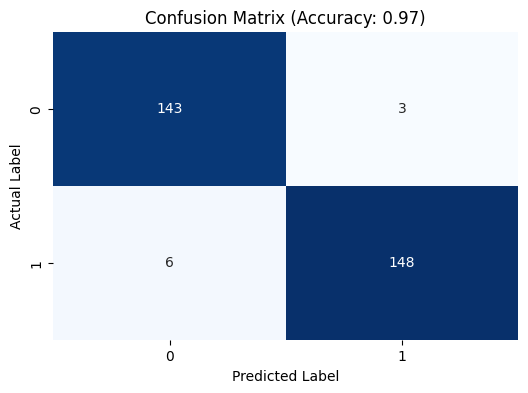

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-fit the model using the updated code with scaling and increased max_iter
from sklearn.preprocessing import StandardScaler

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and fitting the logistic regression model with increased iterations
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


The heatmap shows the performance of the model in terms of true positives, true negatives, false positives, and false negatives.